NAME: PILLAGOLLA JAYAKRISHNA

GMAIL ID:jayakrishnap05789@gmail.com

##Project-2:- Optical Recognition of Handwritten Digits using Scikit-Learn

Recognizing handwritten text is a problem that can be traced back to the first automatic machines that needed to recognize individual characters in handwritten documents.
Think about, for example, the ZIP codes on letters at the post office and the automation needed to recognize these five digits. 
Perfect recognition of these codes is necessary in order to sort mail automatically and efficiently.
Included among the other applications that may come to mind is OCR (Optical Character Recognition) software. 
OCR software must read handwritten text or pages of printed books for general electronic documents in which each character is well defined.
But the problem of handwriting recognition goes farther back in time, more precisely to the early 20th Century (1920s), when Emanuel Goldberg (1881–1970) began his studies regarding this issue and suggested that a statistical approach would be an optimal choice.

In this article we will build a classifier model to recognize handwritten digits (from 0 to 9) using the 'digits' dataset from Scikit-Learn.

Hypothesis to be tested: 
The 'digits' dataset of scikit-learn library provides numerous datasets that are useful for testing many problems of data analysis and prediction of results.
Some scientists claim that it predicts the digit accuracy 95% of the times.

We have to perform analysis to accept or reject this hypothesis.

In [40]:
import warnings
warnings.simplefilter('ignore')

## Importing required libraries 

Required Python libraries are NumPy, Pandas, Matplotlib, Seaborn & Scikit-Learn

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the 'digits' dataset from Scikit-Learn

In [42]:
from sklearn import datasets
digits = datasets.load_digits()

The DESCR provides a description of the dataset -

In [43]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

The images of the handwritten digits are contained in a digits.images array. 
Each element of this array is an image that is represented by an 8x8 matrix of numerical values that correspond to a grayscale from white with a value of 0, to black with the value 15.

In [44]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

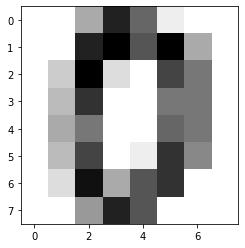

In [45]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [46]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [47]:
digits.target.shape

(1797,)

# Splitting Data into Train and Test sets

In [48]:
X = digits.data
y = digits.target

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

We will evaluate the performance of our model on the basis of its accuracy score.
Also we'll use K-Fold Cross Validation to get an average estimate of accuracy over 10 different subsets of train & test data.

## Support Vector Classifier

In [50]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
y_pred_svc = svc.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svc)

0.9911111111111112

In [53]:
from sklearn.model_selection import cross_val_score
acc_score = np.mean(cross_val_score(svc, X, y, cv=10)) 
print(acc_score)

0.9699503414028554


## Logistic Regression Classifier

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred_lr = lr.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)

0.9511111111111111

In [57]:
from sklearn.model_selection import cross_val_score
acc_score = np.mean(cross_val_score(lr, X, y, cv=10)) 
print(acc_score)

0.928193668528864


## KNN Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
y_pred_knn = knn.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)

0.98

In [39]:
from sklearn.model_selection import cross_val_score
acc_score = np.mean(cross_val_score(knn, X, y, cv=10)) 
print(acc_score)

0.9710738671632526


## Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
y_pred_gb = gb.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_gb)

0.9555555555555556

In [61]:
from sklearn.model_selection import cross_val_score
acc_score = np.mean(cross_val_score(gb, X, y, cv=10)) 
print(acc_score)

0.9331905648665424


## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
y_pred_rf = rf.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rf)

0.98

In [65]:
from sklearn.model_selection import cross_val_score
acc_score = np.mean(cross_val_score(rf, X, y, cv=10)) 
print(acc_score)

0.9499037864680322


So far, we've seen that both the K-Nearest Neighbors & Support Vector Classifiers have performed extremely well on the dataset.
Using cross validation, the Support Vector Classifier has given us an accuracy of 96.995% whereas, the K-Nearest Neighbors Classifier gives us an accuracy of 97.10%.
We can say that these two are the best machine learning algorithms for this kind of task.

## Conclusion

So our null hypothesis that "Some scientists claim that the 'digits' dataset of scikit-learn library predicts the digit accuracy 95% of the times" is accepted.

Now, let's dig a bit deeper for these two classifiers -

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

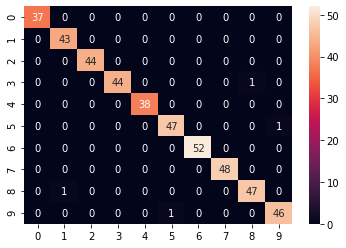

In [32]:
svc_mat = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(svc_mat, annot=True)

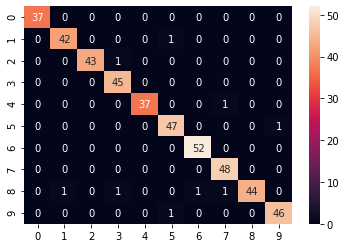

In [33]:
knn_mat = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(knn_mat, annot=True)

In [34]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [35]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.98      0.98        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      0.97      0.99        38
           5       0.96      0.98      0.97        48
           6       0.98      1.00      0.99        52
           7       0.96      1.00      0.98        48
           8       1.00      0.92      0.96        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



The F1-Score for KNN Classifier lies between 0.96-1.00 whereas, the F1-Score for Support Vector Classifier ranges between 0.98-1.00.